In [2]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor
from skimage import io
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.signal import savgol_filter
import os
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq
from scipy.signal import savgol_filter
%matplotlib nbagg

## box size effect on spatial intensity correlation

In [3]:
def boxsize_effect_spatial(img, boxsize, mpp):
    # img: the image to be tested, array-like
    # boxsize: a list of boxsize to be tested, list-like
    # mpp: microns per pixel, float
    data = {}
    for bs in boxsize:
        X, Y, I = divide_windows(img, windowsize=[bs, bs], step=bs)
        CI = corrI(X, Y, I)
        dc = distance_corr(X, Y, CI)
        bsm = bs * mpp # boxsize in microns
        dc.R = dc.R * mpp
        data['{0:.1f}'.format(bsm)] = dc
    for kw in data:
        dc = data[kw]
        length = len(dc)
        smooth_length = int(np.ceil(length/5)*2+1)
        plt.plot(dc.R, savgol_filter(dc.C, smooth_length, 3), label=kw)
    plt.legend()
    return data

<IPython.core.display.Javascript object>


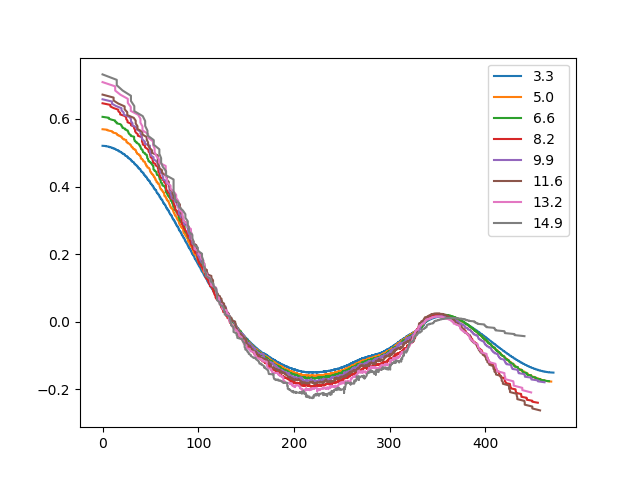

In [12]:
%matplotlib nbagg
img = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = range(10, 50, 5)
mpp= 0.33
data = boxsize_effect_spatial(img, boxsize, mpp)

## Giant number fluctuation analysis

In [15]:
img = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = np.unique(np.floor(np.logspace(0, 2.5, 100)))
NList = []
dNList = []
for bs in boxsize:
    X, Y, I = divide_windows(img, windowsize=[bs, bs], step=bs)
    N = (255-I.mean())*bs*bs
    dN = I.std()*bs*bs
    NList.append(N)
    dNList.append(dN)

<IPython.core.display.Javascript object>


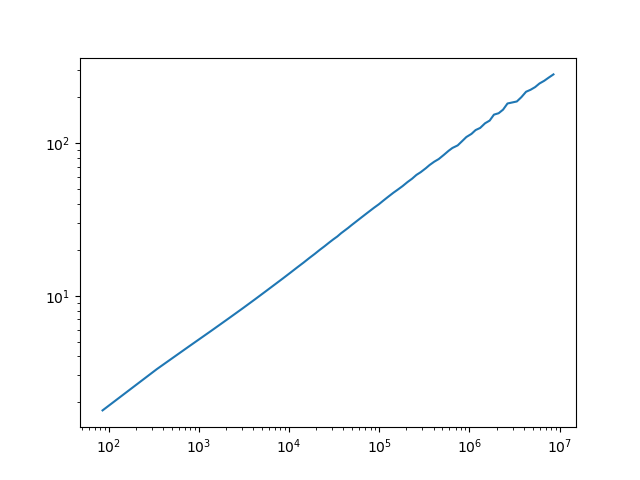

In [16]:
n = np.array(NList)
d = np.array(dNList)
plt.plot(n, d/n**.5)
plt.xscale('log')
plt.yscale('log')

In [19]:
# Automatic slope labeling on log-log plot
x = n
y = d

In [20]:
def power(x, a, b):
    return a*x**b

In [21]:
from scipy import optimize
popt, pcov = optimize.curve_fit(power, x, y)

<IPython.core.display.Javascript object>


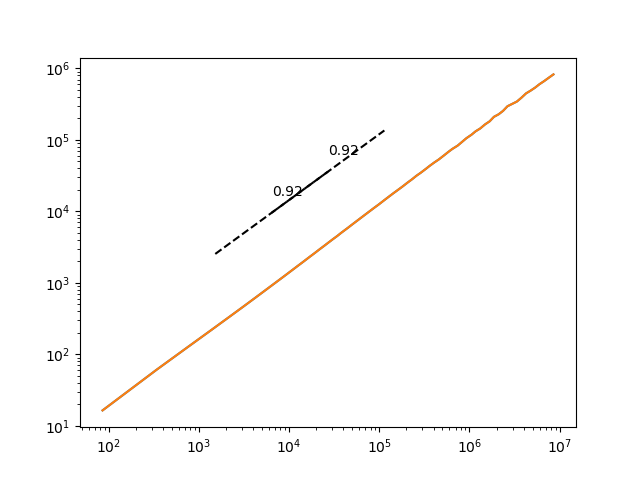

In [43]:
# Position option: ne, n, nw, se, s, sw

# Example: n
# length: 1/4 of total independent variable range
# elevation: 1/5 of total dependent variable range
xmin = np.log10(x.min())
xmax = np.log10(x.max())
ymin = np.log10(y.min())
ymax = np.log10(y.max())
xf = 10**np.array([xmin + (xmax - xmin)*3/8, xmin + (xmax - xmin)*5/8])
yf = 10**((ymax-ymin)/5)*popt[0]*xf**popt[1]
plt.plot(x, y)
plt.plot(xf, yf, ls='--', color='black')
plt.text(10**np.log10(xf).mean(), 10**((ymax-ymin)/20)*10**np.log10(yf).mean(),
         '{:.2f}'.format(popt[1]))
plt.xscale('log')
plt.yscale('log')

In [45]:
df_data = pd.DataFrame(data=np.array([x, y]).transpose(), columns=['N', 'dN'])

In [47]:
df_data.to_csv(r'I:\Github\Python\Correlation\test_images\boxsize_effect\density_fluctuation_data.csv', index=False)

In [60]:
def label_slope(x, y, location='n'):
    # label the slope of a power law curve in a log-log plot with a dashed line
    # location indicates the relative location of the dashed line as to the original data line
    xmin = np.log10(x.min())
    xmax = np.log10(x.max())
    ymin = np.log10(y.min())
    ymax = np.log10(y.max())
    xf = 10**np.array([xmin + (xmax - xmin)*2/8, xmin + (xmax - xmin)*4/8])
    yf = 10**((ymax-ymin)/7)*popt[0]*xf**popt[1]
    xfmin = np.log10(xf)[0]
    xfmax = np.log10(xf)[1]
    xt = 10**(xfmin + (xfmax - xfmin)*3/8)
    yt = 10**((ymax-ymin)/20)*10**np.log10(yf).mean()
    return xf, yf, xt, yt

<IPython.core.display.Javascript object>


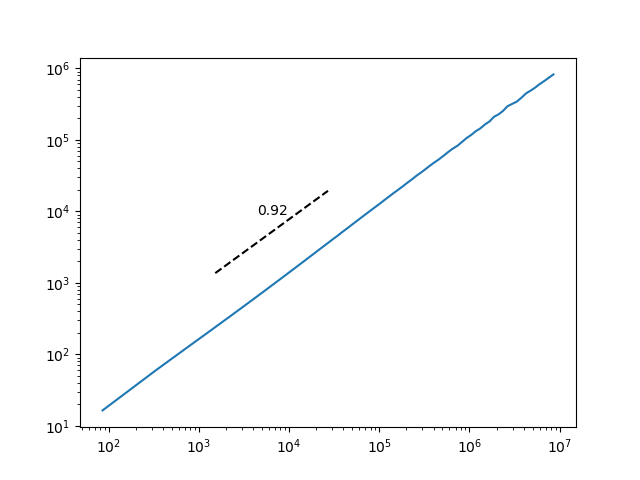

In [61]:
xf, yf, xt, yt = label_slope(x, y, location='n')
plt.plot(x, y)
plt.plot(xf, yf, ls='--', color='black')
plt.text(xt, yt, '{:.2f}'.format(popt[1]))
plt.xscale('log')
plt.yscale('log')

In [55]:
xt

array([3120.38057708, 6406.42996058])